## Adaboosting, Gradient Boosting, XGBoost Classifier

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

In [2]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


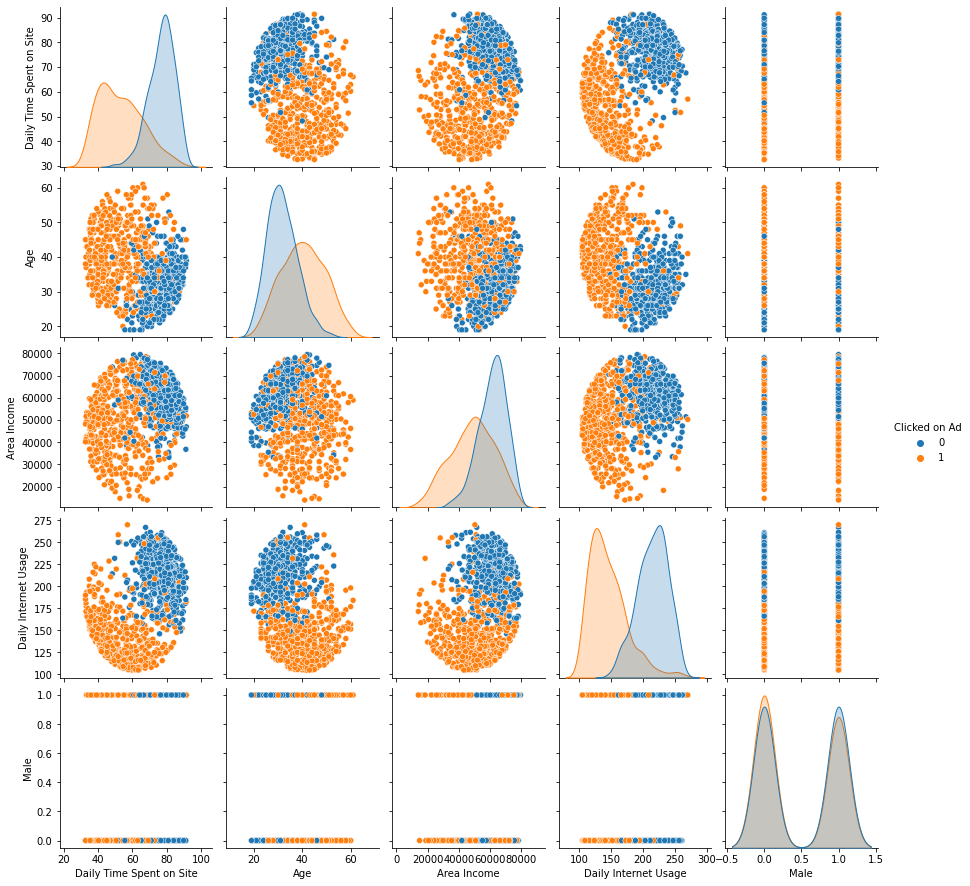

In [5]:
sns.pairplot(df, hue='Clicked on Ad');

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Model Performance

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [10]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [11]:
# base_estimator=DecisionTreeRegressor(max_depth=1) # Default value
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [ ]:
# Learning rate how to work below.

![](2022-10-10-21-28-44.png)

In [12]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [13]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [14]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.968795
test_recall       0.950505
test_f1           0.958988
dtype: float64

In [15]:
from sklearn.tree import plot_tree

In [16]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [ ]:
# targets = df["Clicked on Ad"].astype("str")

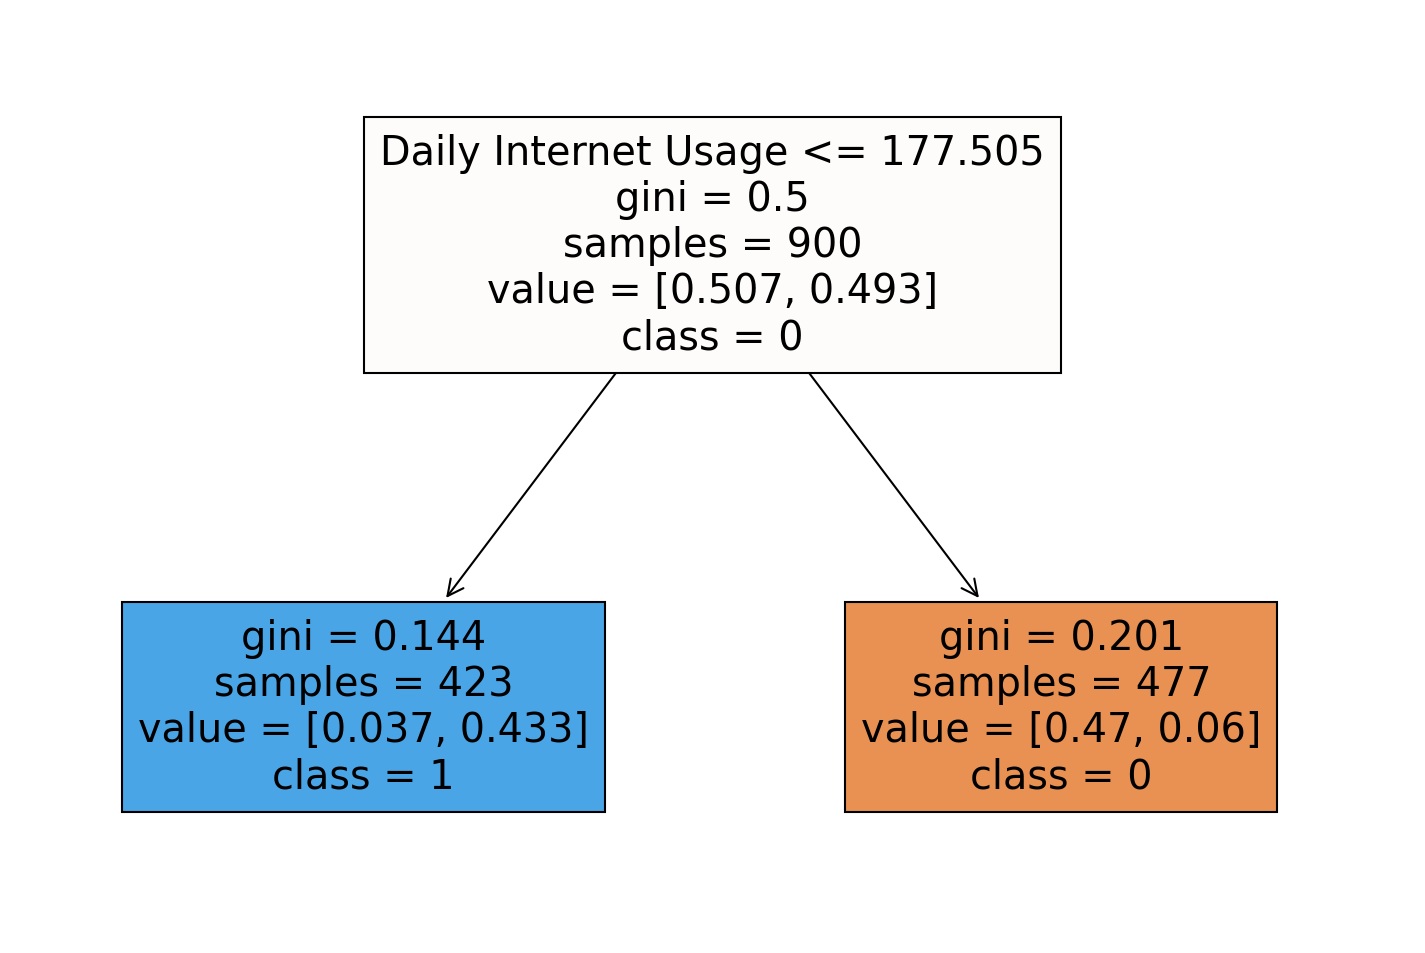

In [17]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str") # We need to change numeric to str. Or else it gives error.
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique());

In [18]:
1-1/2

0.5

In [19]:
model.estimator_errors_

array([0.09666667, 0.15660636, 0.29526371])

In [20]:
1/2*np.log((1-0.09666667)/0.09666667) # 0.estimator Weight    predict -->1

1.117411476360216

In [21]:
1/2*np.log((1-0.15660636)/0.15660636) # 1.estimator Weight   predict -->0

0.8418492023096668

In [22]:
1/2*np.log((1-0.29526371)/0.29526371) # 2.estimator Weight   predict -->0

0.43497739343711583

In [23]:
0.43497739343711583 + 0.8418492023096668 > 1.117411476360216 # 0 weight more than 1 weights. Because of this predicted as 0.

True

## Analyzing performance as more weak learners are added.

In [24]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

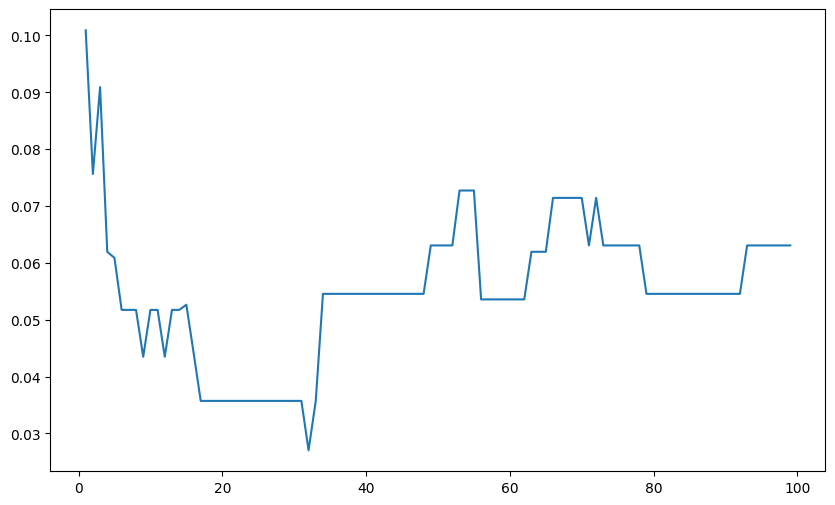

In [25]:
plt.plot(range(1,100), error_rates);

## Gridsearch

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model = AdaBoostClassifier(random_state=42)

In [28]:
param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [29]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [30]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             scoring='f1')

In [31]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [32]:
ada_grid_model.best_score_

0.969132103588408

In [33]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Feature_importances

In [34]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Male,0.00
Area Income,0.21
Age,0.22
Daily Time Spent on Site,0.28
Daily Internet Usage,0.29


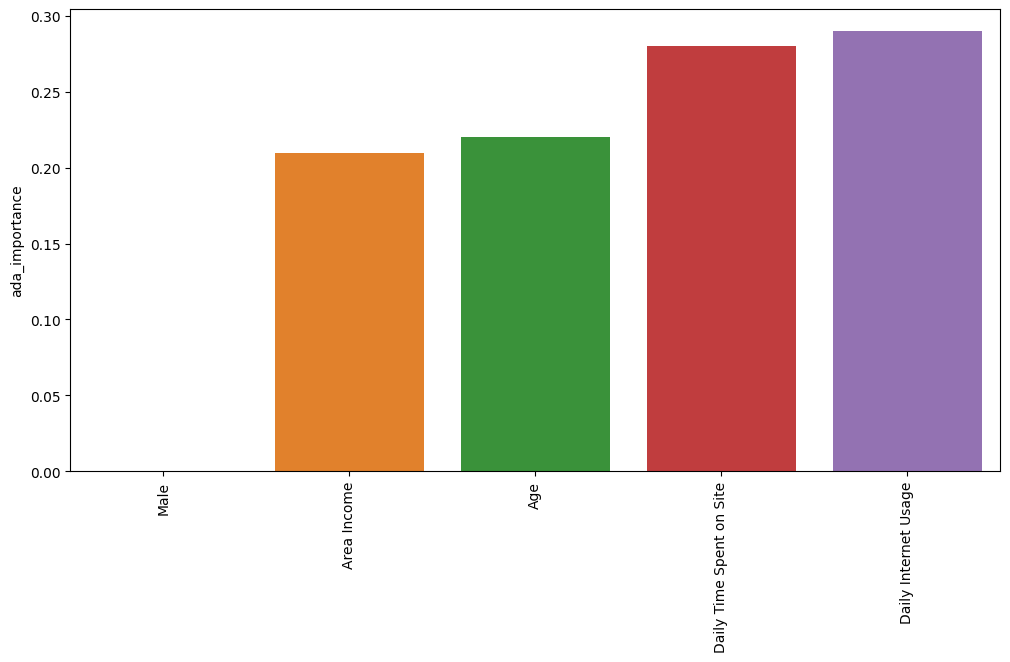

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

In [36]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


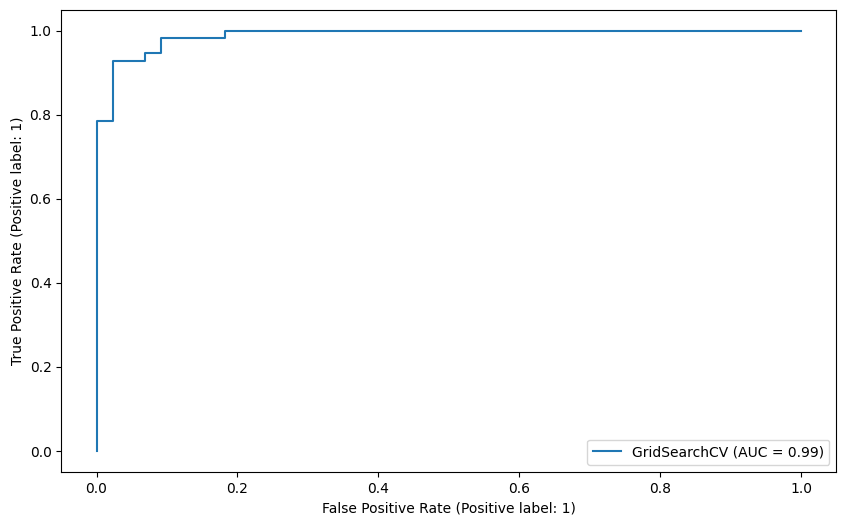

In [37]:
plot_roc_curve(ada_grid_model, X_test, y_test); # We look roc because balance data. AUC for unbalanced data.

## Gradient Boosting Modelling and Model Performance

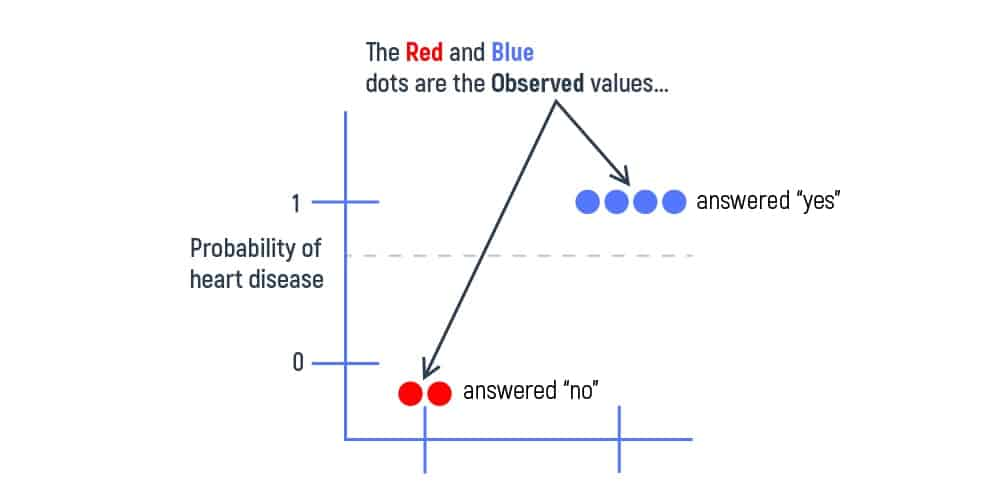

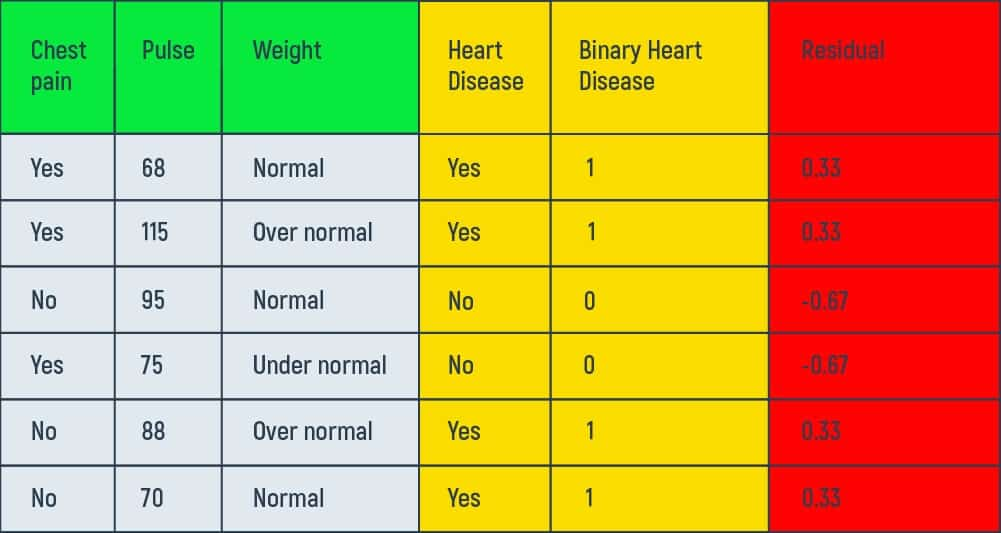

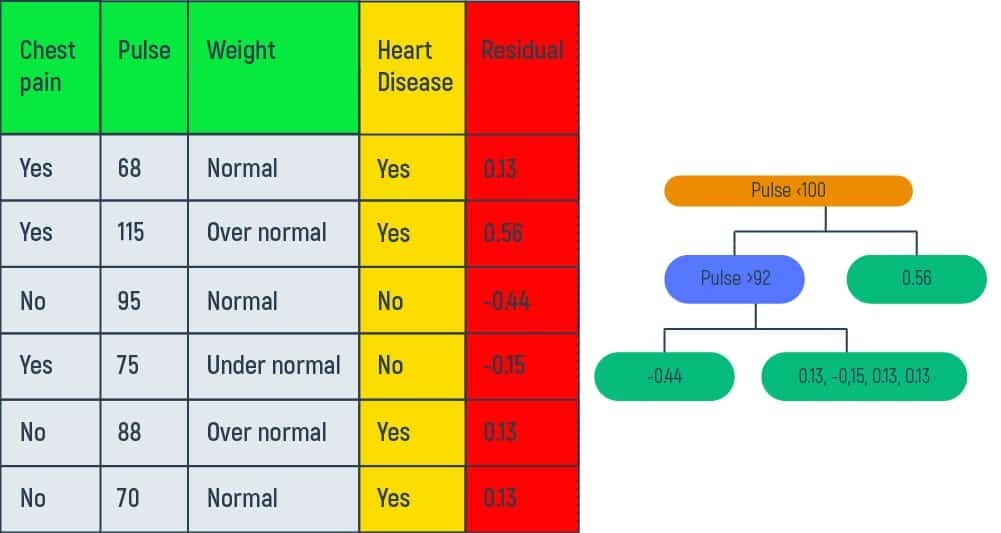

![](2022-10-10-22-45-14.png)

In [40]:
np.log(4/2) 

0.6931471805599453

In [41]:
(np.e**np.log(4/2))/(1+np.e**np.log(4/2))

0.6666666666666666

In [42]:
0.67 + (0.1* 0.33) + (0.1* 0.13)

0.7160000000000001

In [43]:
0.67 + (0.1* -0.67) + (0.1* -0.44)

0.5589999999999999

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
grad_model = GradientBoostingClassifier(random_state=42)

In [46]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [48]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.952222
test_precision    0.958870
test_recall       0.945960
test_f1           0.951603
test_roc_auc      0.987972
dtype: float64

## Gridsearch

In [49]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [50]:
gb_model = GradientBoostingClassifier(random_state=42)

In [51]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [52]:
grid.best_params_

{'max_features': 3, 'n_estimators': 100, 'subsample': 0.5}

In [53]:
grid.best_score_

0.9658340599400116

In [54]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[456   0]
 [  4 440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.99      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Feature importances

In [55]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Male,0.002008
Age,0.053003
Area Income,0.074586
Daily Time Spent on Site,0.319058
Daily Internet Usage,0.551346


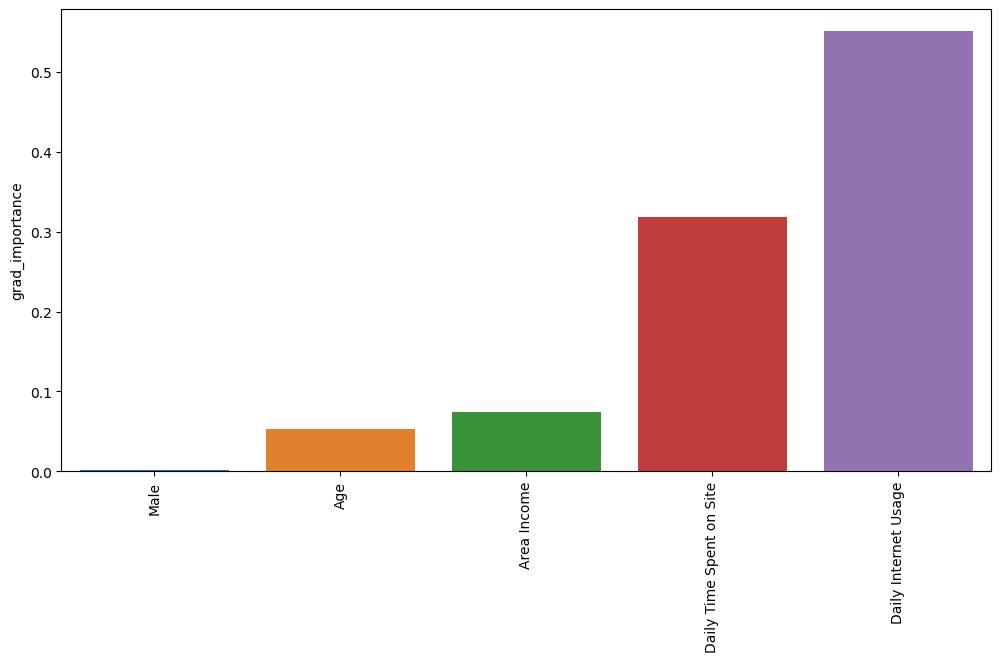

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


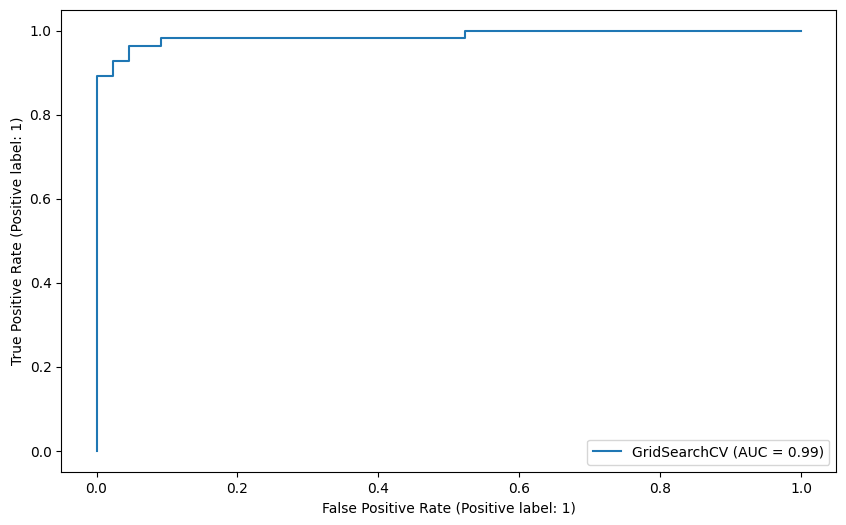

In [57]:
plot_roc_curve(grid, X_test, y_test);

## XG Boosting Modelling and Model Performance

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [60]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [61]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.956667
test_precision    0.966827
test_recall       0.945859
test_f1           0.955630
test_roc_auc      0.988984
dtype: float64

## Gridsearch

In [62]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [63]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
#from sklearn.metrics import make_scorer 

In [ ]:
#xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = make_scorer(precision_score,  average=None, pos_label=1), verbose=2, n_jobs = -1).fit(X_train, y_train)

In [64]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [65]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [66]:
xgb_grid.best_score_

0.9671948031471469

In [67]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[453   3]
 [ 15 429]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Feature importances

In [68]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Male,0.024988
Area Income,0.107107
Age,0.109000
Daily Internet Usage,0.327593
Daily Time Spent on Site,0.431312


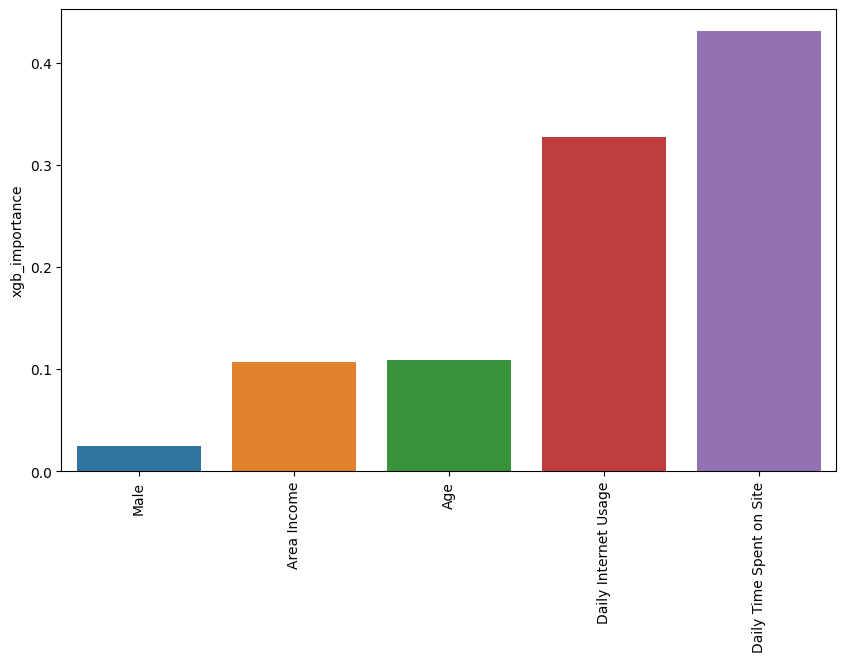

In [69]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [70]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Male,0.00,0.002008,0.024988
Area Income,0.21,0.074586,0.107107
Age,0.22,0.053003,0.109000
Daily Time Spent on Site,0.28,0.319058,0.431312
Daily Internet Usage,0.29,0.551346,0.327593


## Evaluating ROC Curves and AUC

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


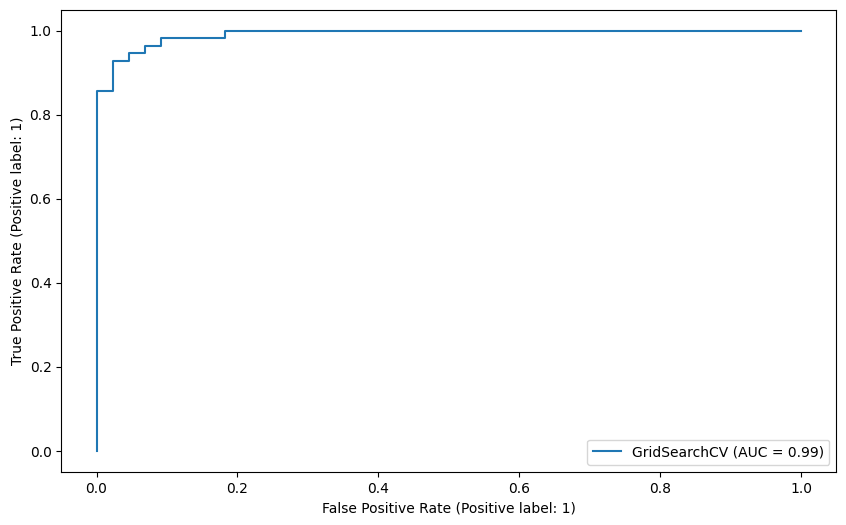

In [71]:
plot_roc_curve(xgb_grid, X_test, y_test);

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Logistic Regression

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[451   5]
 [ 22 422]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.99      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[454   2]
 [ 24 420]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       1.00      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## SVM

In [81]:
from sklearn.svm import SVC

In [82]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[450   6]
 [ 17 427]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## Comparing Models

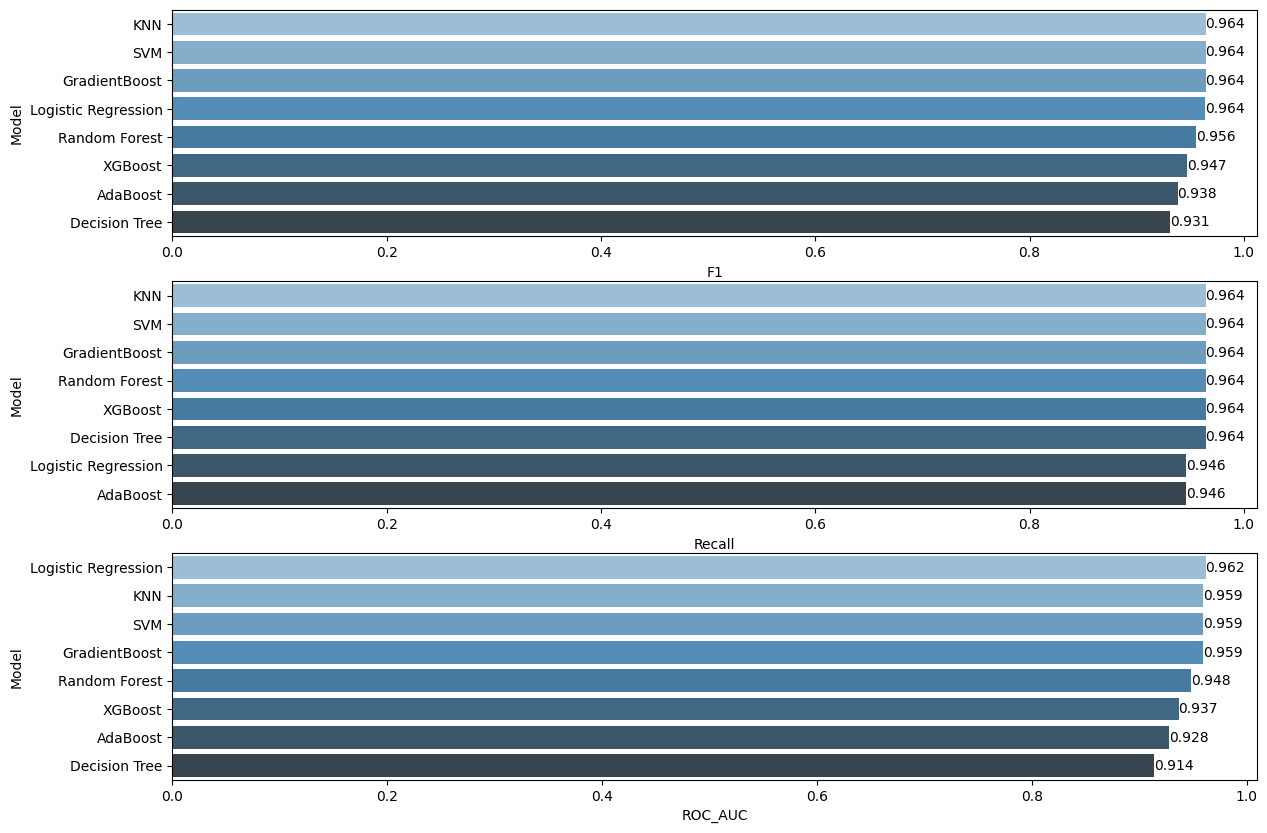

In [83]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# Best Scores with Logistic Regression. We should choice Lr for this dataset.
# Ensemble methods not perform well because of small data.

In [ ]:
# Done